# **Práctica Deep Learning**



Predicción del precio de las habitaciones de AirBnb utilizando todas las **imágenes** disponibles del dataset airbnb mediante:

*   Regresión
*   Clasificación




#### **Cargar las librerías y funciones necesarias**

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [ ]:
# Cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Tratamiento de imágenes
import imageio as io
import cv2

# Sets the value of the specified option
# Para visualizar la información de todas las filas pj dtypes o head().T aplico set_option en max_rows 
pd.set_option('display.max_rows', None)
# Para visualizar la información de la matriz de correlación
pd.set_option('display.max_columns', None)

In [ ]:
# Función que realiza comprobaciones sobre una columna de un dataframe
def check_column(df, col_name):
    values_unique = len(df[col_name].unique())
    values_nan = df[col_name].isnull().sum()
    portmissing = round((df[col_name].isnull().sum()/len(df))*100, 4)
    
    print (f'{col_name} consta de: {values_unique} valores distintos de un total de {len(df)}')
    print (f'{col_name} consta de: {values_nan} valores ausentes, {portmissing}%')
    
    df[col_name].value_counts().head()

In [ ]:
# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [ ]:
# Función que define la red MLP Multi-Layer Perceptron
# parámetro regress = True para problema de regresión con función de activación linear (sin función de activación) y 1 neurona
# parámetro regress = False para problema de clasificación con función de activación softmax indicando el nº de clases de la variable objetivo y este valor será el nº de neuronas 
from tensorflow.keras.models import Sequential#, Model
from tensorflow.keras.layers import Dense#, BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, , Flatten, Input

def create_mlp(dim, regress):
	# define our MLP network
	model = Sequential()
	model.add(Dense(32, input_dim=dim, activation='relu'))
	model.add(Dense(18, activation='relu'))
	model.add(Dense(4, activation='relu'))
	# check to see if the regression node should be added with function activation linear
	# otherwise (classification) use softmax with the number of classes
	if regress:
		model.add(Dense(1, activation="linear"))
	else:
		model.add(Dense(5, activation="softmax"))  
  
	# return our model
	return model

#### **Cargar Dataset airbnb**

In [ ]:
# Montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Read a dot comma-separated values (csv) file into DataFrame called df_airbnb
df_airbnb = pd.read_csv('/content/drive/My Drive/airbnb_listings.csv', sep=';', decimal='.')   

print(f'Dimensiones del dataframe df_airbnb son: {df_airbnb.shape[0]} filas y {df_airbnb.shape[1]} columnas')

Dimensiones del dataframe df_airbnb son: 14780 filas y 89 columnas


### **Tratamiento de las imágenes**



```
Análisis de las variables URL

    Listing Url: URL del alojamiento
    Thumbnail Url: URL miniatura
    Medium Url: URL tamaño medio
    Picture Url: Url descarga foto
    XL Picture Url: URL tamaño grande
    Host URL: URL del anfitrión o host
    Host Thumbnail Url: URL foto del host tamaño miniatura
    Host Picture  Url: URL foto del host tamaño medio
```



In [ ]:
# Análisis de las variables URL para el tratamiento de las imágenes
check_column(df_airbnb, 'Listing Url') 

check_column(df_airbnb, 'Thumbnail Url') 
check_column(df_airbnb, 'Medium Url')
check_column(df_airbnb, 'Picture Url') 
check_column(df_airbnb, 'XL Picture Url')

check_column(df_airbnb, 'Host URL') 

check_column(df_airbnb, 'Host Thumbnail Url') 
check_column(df_airbnb, 'Host Picture Url') 

Listing Url consta de: 14780 valores distintos de un total de 14780
Listing Url consta de: 0 valores ausentes, 0.0%
Thumbnail Url consta de: 11958 valores distintos de un total de 14780
Thumbnail Url consta de: 2820 valores ausentes, 19.0798%
Medium Url consta de: 11958 valores distintos de un total de 14780
Medium Url consta de: 2820 valores ausentes, 19.0798%
Picture Url consta de: 14758 valores distintos de un total de 14780
Picture Url consta de: 19 valores ausentes, 0.1286%
XL Picture Url consta de: 11958 valores distintos de un total de 14780
XL Picture Url consta de: 2820 valores ausentes, 19.0798%
Host URL consta de: 8935 valores distintos de un total de 14780
Host URL consta de: 0 valores ausentes, 0.0%
Host Thumbnail Url consta de: 8894 valores distintos de un total de 14780
Host Thumbnail Url consta de: 3 valores ausentes, 0.0203%
Host Picture Url consta de: 8894 valores distintos de un total de 14780
Host Picture Url consta de: 3 valores ausentes, 0.0203%


In [ ]:
# Dataframe con las imágenes 
df_urls = df_airbnb.loc[:, 'Thumbnail Url':'XL Picture Url' ]
print(f'Dimensiones datos entrenamiento son: {df_urls.shape}')
df_urls.head(3)

Dimensiones datos entrenamiento son: (14780, 4)


,Thumbnail Url,Medium Url,Picture Url,XL Picture Url
0,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...
1,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...
2,https://a0.muscache.com/im/pictures/57011236/e...,https://a0.muscache.com/im/pictures/57011236/e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/57011236/e...


In [ ]:
# Incluimos en el df de las imágenes la variable Listing Url
df_urls['Listing Url'] = df_airbnb['Listing Url']
print(f'Dimensiones del dataframe df_urls son: {df_urls.shape}')
df_urls.head(3)

Dimensiones del dataframe df_urls son: (14780, 5)


,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Listing Url
0,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://www.airbnb.com/rooms/12768616
1,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://www.airbnb.com/rooms/1629146
2,https://a0.muscache.com/im/pictures/57011236/e...,https://a0.muscache.com/im/pictures/57011236/e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/57011236/e...,https://www.airbnb.com/rooms/4539828


In [ ]:
print('Thumbnail Url: ', df_urls['Thumbnail Url'][1])
print('Medium Url   : ', df_urls['Medium Url'][1])
print('Picture Url  : ', df_urls['Picture Url'][1])
print('XL Picture Url: ', df_urls['XL Picture Url'][1])
print('Listing Url: ', df_urls['Listing Url'][1])


Thumbnail Url:  https://a0.muscache.com/im/pictures/ea919e56-aa99-4d5d-a129-1edf0d117d6a.jpg?aki_policy=small
Medium Url   :  https://a0.muscache.com/im/pictures/ea919e56-aa99-4d5d-a129-1edf0d117d6a.jpg?aki_policy=medium
Picture Url  :  https://public.opendatasoft.com/api/v2/catalog/datasets/airbnb-listings/files/4b3f714036f61061b857571fa1dbfa8f
XL Picture Url:  https://a0.muscache.com/im/pictures/ea919e56-aa99-4d5d-a129-1edf0d117d6a.jpg?aki_policy=x_large
Listing Url:  https://www.airbnb.com/rooms/1629146


In [ ]:
print('Thumbnail Url: ', df_urls['Thumbnail Url'][22])
print('Medium Url   : ', df_urls['Medium Url'][22])
print('Picture Url  : ', df_urls['Picture Url'][22])
print('XL Picture Url: ', df_urls['XL Picture Url'][22])
print('Listing Url: ', df_urls['Listing Url'][22])

Thumbnail Url:  https://a0.muscache.com/im/pictures/a4322298-d93c-48d7-acf2-ca7b27f27e84.jpg?aki_policy=small
Medium Url   :  https://a0.muscache.com/im/pictures/a4322298-d93c-48d7-acf2-ca7b27f27e84.jpg?aki_policy=medium
Picture Url  :  https://public.opendatasoft.com/api/v2/catalog/datasets/airbnb-listings/files/2b04f7a9d4d4cc75fe300ef2d0f5d8d2
XL Picture Url:  https://a0.muscache.com/im/pictures/a4322298-d93c-48d7-acf2-ca7b27f27e84.jpg?aki_policy=x_large
Listing Url:  https://www.airbnb.com/rooms/13841176




```
    Observamos que las imagenes jpg referenciadas en las variables Thumbnail Url, Medium Url y XL Picture Url son las mismas, unicamente cambia 
    el parámetro aki_policy de small, medium y x_large respectivamente. Trabajaremos con la variable Thumbnail Url puesto que las imágenes son 
    de menor dimensión.
    Picture Url descarga una imagen jpg dimensiones 639*426 y 96 resolución
    Listing Url nos redirige en ocasiones al home de airbnb https://www.airbnb.es/s/homes y en otros casos a la url del alojamiento donde 
    observamos la posibilidad de descargarnos más fotos
```



In [ ]:
# Eliminamos los registros ausentes de la variable Thumbnail Url para trabajar con muestras con imágenes
df_airbnb.dropna(subset=['Thumbnail Url'], inplace=True)
print(f'Dimensiones datos df_airbnb con valores en la columna Thumbnail Url son: {df_airbnb.shape}')
check_column(df_airbnb, 'Thumbnail Url')

Dimensiones datos df_airbnb con valores en la columna Thumbnail Url son: (11960, 89)
Thumbnail Url consta de: 11957 valores distintos de un total de 11960
Thumbnail Url consta de: 0 valores ausentes, 0.0%


**Proceso de carga de las imágenes en un array con la url y el índice correspondiente**




In [ ]:
# Creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths = [[i, img_url] for i, img_url in enumerate(df_airbnb['Thumbnail Url'])]
print(f'Dimensiones del array de imágenes son: {len(images_paths)}')

# visualizamos los 5 primeros registros
images_paths[0:5]

Dimensiones del array de imágenes son: 11960


[[0,
  'https://a0.muscache.com/im/pictures/cffe393a-0d84-4fd5-ab4c-a62e067c1b0d.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/ea919e56-aa99-4d5d-a129-1edf0d117d6a.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/57011236/eea5c213_original.jpg?aki_policy=small'],
 [3,
  'https://a0.muscache.com/im/pictures/974f0245-55c2-4e8c-b9bf-14c1c975c798.jpg?aki_policy=small'],
 [4,
  'https://a0.muscache.com/im/pictures/c2dde263-20dd-43af-8c6b-be636c2c0ce1.jpg?aki_policy=small']]

In [ ]:
# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente y cuales no
was_loaded = np.zeros(len(images_paths))

print(f'Dimensiones del array de loaded_images son: {loaded_images.shape}')
print(f'Dimensiones del array de was_loaded son: {was_loaded.shape}')

Dimensiones del array de loaded_images son: (11960, 224, 224, 3)
Dimensiones del array de was_loaded son: (11960,)


In [ ]:
# Lo ejecutmos una sola vez
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 11960/11960 [35:43<00:00,  5.58it/s]

Terminado!
Total de imágenes recuperadas correctamente: 11942.0/11960




```
100%|██████████| 11960/11960 [35:43<00:00,  5.58it/s]Terminado!
Total de imágenes recuperadas correctamente: 11942.0/11960
```



**Descarga de las imágenes y procedemos a guardarlas en GDrive para no repetir el proceso**

In [ ]:
# Ejecutado 1 sola vez Save NumPy Array to .NPY File (binary)
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_dropna.npy', loaded_images)
np.save('was_loaded_dropna.npy', was_loaded)

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images_dropna.npy /content/drive/My\ Drive/images_dropna.npy
!cp was_loaded_dropna.npy /content/drive/My\ Drive/was_loaded_dropna.npy

In [ ]:
# Comprobar que tenemos los ficheros descargados
!ls -lah /content/drive/My\ Drive/images_dropna.npy /content/drive/My\ Drive/was_loaded_dropna.npy

-rw------- 1 root root 1.7G Jun 22 10:16 '/content/drive/My Drive/images_dropna.npy'
-rw------- 1 root root  94K Jun 22 10:16 '/content/drive/My Drive/was_loaded_dropna.npy'


In [ ]:
# Cargamos las imágenes de los ficheros salvados en drive
loaded_images=np.load('/content/drive/My Drive/images_dropna.npy')
was_loaded = np.load('/content/drive/My Drive/was_loaded_dropna.npy')

print(f'Dimensiones del array de loaded_images son: {loaded_images.shape}')
print(f'Dimensiones del array de was_loaded son: {was_loaded.shape}')

Dimensiones del array de loaded_images son: (11960, 224, 224, 3)
Dimensiones del array de was_loaded son: (11960,)


In [ ]:
# De las 11960 muestras de airbnb con referencia en la columna Thumbnail URL, se han descargado un total de 11942 imágenes
# Nos quedamos exclusivamente con estos datos
loaded_images_ok = loaded_images[was_loaded==1]
loaded_images_ok.shape

(11942, 224, 224, 3)

In [ ]:
# Ejecutado 1 sola vez Save NumPy Array to .NPY File (binary)
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('loaded_images_ok.npy', loaded_images_ok)

In [ ]:
# almacenamos las imagenes en nuestro drive
!cp loaded_images_ok.npy /content/drive/My\ Drive/loaded_images_ok.npy

In [ ]:
# Comprobar que tenemos las imágenes descargadas
!ls -lah /content/drive/My\ Drive/loaded_images_ok.npy

-rw------- 1 root root 1.7G Jun 22 10:19 '/content/drive/My Drive/loaded_images_ok.npy'


In [ ]:
# Recuperar las imágenes descargadas del dataframe airbnb
loaded_images_ok = np.load('/content/drive/My Drive/loaded_images_ok.npy')

In [ ]:
# Nos quedamos con las muestras del dataset airbnb asociadas a las descarga de imágenes realizada
df_airbnb_images = df_airbnb[was_loaded==1]
df_airbnb_images.shape

(11942, 89)

In [ ]:
# Guardamos el df airbnb con las imágenes
df_airbnb_images.to_csv('/content/drive/My Drive/df_airbnb_images_11942.csv', sep=';', decimal='.', index=False)

#### **Cargar el modelo VGG-16**

In [ ]:
# Aplicamos el modelo VGG16 para extraer la etapa de extracción de características o FE
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

# Modelo VGG16 base con sus pesos  (include_top = True indica que si cargamos la capa de clasificación )  FE+ Flatten + CL
model_vgg16 = VGG16(weights="imagenet", include_top=False)

# Modelo con la capa GlobalAveragePooling 
# con la finalidd de convertir los mapas de activacones 2D de la última capa de la etapa de FE a un vector de  nclasses  que 
# se utiliza para calcular la probabilidad de pertenecer a cada clase
x = model_vgg16.output
model_gap = GlobalAveragePooling2D()(x)

# Modelo resultante
model = Model(inputs=model_vgg16.input, outputs=model_gap)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
____________________________________________________________

In [ ]:
loaded_images_ok.shape[0]

11942

In [ ]:
df_airbnb_images.shape[0]

11942

In [ ]:
from tqdm import tqdm  
from keras.preprocessing.image import img_to_array

# Realizamos el procesado de las imágenes para extraer el vector de 512 características
images_fe = np.zeros((loaded_images_ok.shape[0], 512))

for i in tqdm(range(loaded_images_ok.shape[0])):
    img = loaded_images_ok[i]
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Extracción de las características sobre el modelo vgg16 con los pesos de imagenet
    features = model.predict(x)
    images_fe[i] = features[0]

  0%|          | 0/11942 [00:00<?, ?it/s]

100%|██████████| 11942/11942 [01:23<00:00, 143.20it/s]


In [ ]:
# Ejecutado 1 sola vez
# Save NumPy Array to .NPY File (binary)
np.save('features_img_ok.npy', images_fe)
# almacenamos las imagenes en nuestro drive
!cp features_img_ok.npy /content/drive/My\ Drive/features_img_ok.npy
# Comprobar que tenemos las imágenes descargadas
!ls -lah /content/drive/My\ Drive/features_img_ok.npy


-rw------- 1 root root 47M Jun 22 10:23 '/content/drive/My Drive/features_img_ok.npy'


In [ ]:
# Cargamos el fichero con las características de las imágenes
images_fe=np.load('/content/drive/My Drive/features_img_ok.npy')
print(f'Dimensiones del array de images_fe son: {images_fe.shape}')

Dimensiones del array de images_fe son: (11942, 512)


In [ ]:
images_fe.shape

(11942, 512)

#### **Etiqueta de la variable objetivo**

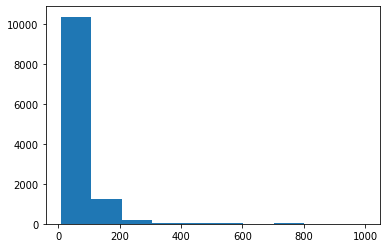

In [ ]:
# Etiqueta de la variable objetivo para el problema de regresión
y =df_airbnb_images['Price']

import matplotlib.pyplot as plt
plt.hist(y, bins=10)
plt.show()

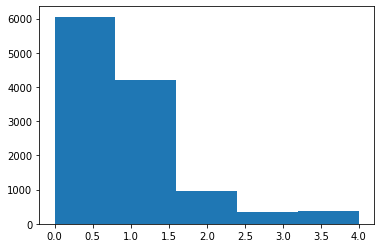

In [ ]:
# Etiqueta de la variable objetivo para el problema de clasificación
y = df_airbnb_images['Price']
y_class = []

for x in y:
    # La variable objetivo se asocia a 5 clases barato, medio, medio alto, caro y  muy caro
    if x <= 50:
        y_class.append(0)
    elif x <=100:
        y_class.append(1)
    elif x <=150:
        y_class.append(2)
    elif x <=200:
        y_class.append(3)
    else:
        y_class.append(4)

# y un rango para clasificación (del 1 al 5 por ejemplo: barato, medio, medio alto, caro y muy caro)
import matplotlib.pyplot as plt
plt.hist(y_class, bins=5)
plt.show()

#### **Regresión con imágenes**

In [ ]:
from sklearn import preprocessing

# Normalización de las imágenes
scaler = preprocessing.MinMaxScaler()
images_norm = scaler.fit_transform(images_fe)

In [ ]:
from sklearn.model_selection import train_test_split

# Normalización de las etiquetas
y_norm = y/y.max()

# Vamos a dividir en train, validation y en test pero con una muestra de 2000 registros.
# La razón por la que hago esto es porque en el proceso de entrenamiento nuestro modelo se satura y el resultado final aún modificando
# los hiperparámetros o modificando las unidades de las capas densas siempre era el mismo loss: nan - val_loss: nan
X_train, X_test, y_train, y_test = train_test_split(images_norm[0:2000], y_norm[0:2000], test_size=0.33,  shuffle=True, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,  shuffle=True, random_state=0)

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l1_l2

# Creación del modelo MLP para el problema de regresión con imágenes la función de activación es 'linear' (sin función de activación)
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))

# Optimizador Adam
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss="mean_squared_error", optimizer=opt)

# train the model
print("[INFO] training model...")
history = model.fit(x=X_train, y=y_train, 
	        validation_data=(X_val, y_val),
	        epochs=10, batch_size=16)  


[INFO] training model...
Train on 1072 samples, validate on 268 samples
Epoch 1/10
1072/1072 [==============================] - 2s 2ms/step - loss: 0.0085 - val_loss: 0.0067
Epoch 2/10
1072/1072 [==============================] - 0s 267us/step - loss: 0.0053 - val_loss: 0.0057
Epoch 3/10
1072/1072 [==============================] - 0s 259us/step - loss: 0.0047 - val_loss: 0.0055
Epoch 4/10
1072/1072 [==============================] - 0s 255us/step - loss: 0.0042 - val_loss: 0.0054
Epoch 5/10
1072/1072 [==============================] - 0s 249us/step - loss: 0.0038 - val_loss: 0.0053
Epoch 6/10
1072/1072 [==============================] - 0s 257us/step - loss: 0.0036 - val_loss: 0.0053
Epoch 7/10
1072/1072 [==============================] - 0s 257us/step - loss: 0.0032 - val_loss: 0.0053
Epoch 8/10
1072/1072 [==============================] - 0s 262us/step - loss: 0.0030 - val_loss: 0.0051
Epoch 9/10
1072/1072 [==============================] - 0s 249us/step - loss: 0.0027 - val_loss: 0



``` 
Epoch 10/10  
1072/1072 [=============] - 0s 137us/step - loss: 0.0021 - val_loss: 0.0065 opt = Adam(lr=0.001, decay=1e-6)  batch_size=32 Dense 32
1072/1072 [=============] - 0s 128us/step - loss: 0.0034 - val_loss: 0.0051 opt = Adam(lr=0.001, decay=1e-6)  batch_size=32 Dense 8
1072/1072 [=============] - 0s 137us/step - loss: 7.6088e-04 - val_loss: 0.0055 opt = Adam(lr=0.001, decay=1e-6)  batch_size=32 Dense 64 y 32
1072/1072 [=============] - 0s 134us/step - loss: 0.0036 - val_loss: 0.0056 opt = Adam(lr=0.001, decay=1e-6)  batch_size=32 Dense 16
1072/1072 [=============] - 0s 263us/step - loss: 0.0026 - val_loss: 0.0052 opt = Adam(lr=0.001, decay=1e-6)  batch_size=16 Dense 16
```



Para la muestra completa de las imágenes descargadas, el resultado en el entrenamiento siempre ha sido el mismo **loss: nan - val_loss: nan**, aún modificando los valores de los hiperparámetros (learning rate, batch size, epochs), parametros en el optimizador Adam utilizado,  aplicando Dropout y regularización l1 o mixta l1_l2, además de variar las unidades de la capa densa del modelo MLP.

Ahora, con la muestra de 2000 imágenes, si se han conseguido estos resultados.

Nos quedamos con el modelo con una capa densa de 16 units y un batch size de 16 ya que obtenemos el mínimo valor en la función de perdidas conjuntamente en train y validation

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential

# Creación del modelo MLP para el problema de regresión con imágenes la función de activación es 'linear' (sin función de activación)
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))

# Optimizador Adam
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss="mean_squared_error", optimizer=opt)

# train the model
print("[INFO] training model...")
history = model.fit(x=X_train, y=y_train, 
	        validation_data=(X_val, y_val),
	        epochs=50, batch_size=16)  

[INFO] training model...
Train on 1072 samples, validate on 268 samples
Epoch 1/50
1072/1072 [==============================] - 2s 2ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 2/50
1072/1072 [==============================] - 0s 261us/step - loss: 0.0050 - val_loss: 0.0055
Epoch 3/50
1072/1072 [==============================] - 0s 254us/step - loss: 0.0044 - val_loss: 0.0051
Epoch 4/50
1072/1072 [==============================] - 0s 257us/step - loss: 0.0039 - val_loss: 0.0056
Epoch 5/50
1072/1072 [==============================] - 0s 257us/step - loss: 0.0035 - val_loss: 0.0051
Epoch 6/50
1072/1072 [==============================] - 0s 262us/step - loss: 0.0031 - val_loss: 0.0051
Epoch 7/50
1072/1072 [==============================] - 0s 277us/step - loss: 0.0028 - val_loss: 0.0050
Epoch 8/50
1072/1072 [==============================] - 0s 247us/step - loss: 0.0024 - val_loss: 0.0051
Epoch 9/50
1072/1072 [==============================] - 0s 266us/step - loss: 0.0021 - val_loss: 0



```
Epoch 50/50
1072/1072 [==============================] - 0s 258us/step - loss: 1.9605e-04 - val_loss: 0.0056 
```



In [ ]:
# Evaluamos la función de perdidas en test
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

660/660 [==============================] - 0s 87us/step
Loss=0.005767127233698512


In [ ]:
import locale

# make predictions on the testing data
print("[INFO] predicting house prices airbnb ...")
preds = model.predict(X_test)

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(y.mean(), grouping=True),
	locale.currency(y.std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices airbnb ...
[INFO] avg. house price: $68.26, std house price: $68.01
[INFO] mean: 84.70%, std: 101.76%


Nuestro mean_squared_error final implica que, en promedio, nuestra red tendrá un ~ 85% de descuento en sus predicciones del precio de la vivienda con una desviación estándar de ~ 101.7%. 

```
[INFO] predicting house prices airbnb ...
[INFO] avg. house price: $68.26, std house price: $68.01
[INFO] mean: 84.70%, std: 101.76%
```



#### **Clasificación con imágenes**

In [ ]:
from sklearn import preprocessing

# Normalización de las imágenes
scaler = preprocessing.MinMaxScaler()
images_norm = scaler.fit_transform(images_fe)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Clasificación de la etiqueta objetivo Price en 5 clases 
y_norm = to_categorical(y_class)

# Vamos a dividir en train, validation y en test con la muestra completa de las imágenes
X_train, X_test, y_train, y_test = train_test_split(images_norm, y_norm, test_size=0.33,  shuffle=True, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,  shuffle=True, random_state=0)

In [ ]:
# Modelo para el problema de clasificación (función de perdida categorical_crossentropy y metrica accuracy y función de activación softmax)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32)

loss, acc = model.evaluate(X_val, y_val)
print(f'Loss={loss}, Acc={acc}')

Train on 6400 samples, validate on 1601 samples
Epoch 1/50
6400/6400 [==============================] - 2s 348us/step - loss: 1.1108 - accuracy: 0.5255 - val_loss: 1.0119 - val_accuracy: 0.6046
Epoch 2/50
6400/6400 [==============================] - 1s 147us/step - loss: 0.9947 - accuracy: 0.5966 - val_loss: 0.9872 - val_accuracy: 0.6184
Epoch 3/50
6400/6400 [==============================] - 1s 149us/step - loss: 0.9649 - accuracy: 0.6080 - val_loss: 0.9822 - val_accuracy: 0.6146
Epoch 4/50
6400/6400 [==============================] - 1s 144us/step - loss: 0.9430 - accuracy: 0.6162 - val_loss: 0.9983 - val_accuracy: 0.6184
Epoch 5/50
6400/6400 [==============================] - 1s 149us/step - loss: 0.9233 - accuracy: 0.6291 - val_loss: 0.9895 - val_accuracy: 0.6096
Epoch 6/50
6400/6400 [==============================] - 1s 154us/step - loss: 0.9021 - accuracy: 0.6391 - val_loss: 0.9985 - val_accuracy: 0.6159
Epoch 7/50
6400/6400 [==============================] - 1s 154us/step - loss

Accuracy obtenido en train es aproximadamente de un 99% y un 55% en validación, existe overfitting.

```
Epoch 50/50
6400/6400 [==============================] - 1s 147us/step - loss: 0.0492 - accuracy: 0.9911 - val_loss: 3.5713 - val_accuracy: 0.5547
1601/1601 [==============================] - 0s 91us/step
Loss=3.571327621083495, Acc=0.5546533465385437
```





Vamos a realizar las siguientes pruebas:

- The Dropout layer randomly sets input units to 0 which helps prevent overfitting con L1
- Dropout con L1+L2
- BatchNormalization y MaxPooling en redes convolucionales


In [ ]:
# Etapa de clasificación (capas densas con L1 +dropout+softmax con Adam como optimizador)
# Modelo para el problema de clasificación (función de perdida categorical_crossentropy y metrica accuracy)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(lr=1e-4, decay=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32)

loss, acc = model.evaluate(X_val, y_val)
print(f'Loss={loss}, Acc={acc}')

Train on 6400 samples, validate on 1601 samples
Epoch 1/50
6400/6400 [==============================] - 2s 368us/step - loss: 15.1772 - accuracy: 0.3847 - val_loss: 12.3139 - val_accuracy: 0.5166
Epoch 2/50
6400/6400 [==============================] - 1s 157us/step - loss: 9.9267 - accuracy: 0.4888 - val_loss: 7.7167 - val_accuracy: 0.5128
Epoch 3/50
6400/6400 [==============================] - 1s 158us/step - loss: 6.0027 - accuracy: 0.4919 - val_loss: 4.4398 - val_accuracy: 0.5122
Epoch 4/50
6400/6400 [==============================] - 1s 156us/step - loss: 3.3311 - accuracy: 0.4966 - val_loss: 2.3517 - val_accuracy: 0.5122
Epoch 5/50
6400/6400 [==============================] - 1s 158us/step - loss: 1.7890 - accuracy: 0.4969 - val_loss: 1.3469 - val_accuracy: 0.5122
Epoch 6/50
6400/6400 [==============================] - 1s 158us/step - loss: 1.2547 - accuracy: 0.4986 - val_loss: 1.1890 - val_accuracy: 0.5122
Epoch 7/50
6400/6400 [==============================] - 1s 157us/step - lo

El accuracy obtenido en train 50.28% es incluso algo inferior al de validación 51.22%, observamos que el modelo no está aprendiendo con Dropout y regularización L1

```
Epoch 50/50
6400/6400 [==============================] - 1s 158us/step - loss: 1.1295 - accuracy: 0.5028 - val_loss: 1.1177 - val_accuracy: 0.5122
1601/1601 [==============================] - 0s 92us/step
Loss=1.1176548570785427, Acc=0.5121799111366272
```



In [ ]:
# Etapa de clasificación (capas densas con L1_L2 +dropout+softmax)
# Modelo para el problema de clasificación (función de perdida categorical_crossentropy y metrica accuracy)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(lr=1e-3, decay=1e-4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=128)

loss, acc = model.evaluate(X_val, y_val)
print(f'Loss={loss}, Acc={acc}')

Train on 6400 samples, validate on 1601 samples
Epoch 1/50
6400/6400 [==============================] - 2s 261us/step - loss: 11.9866 - accuracy: 0.4225 - val_loss: 5.9552 - val_accuracy: 0.5116
Epoch 2/50
6400/6400 [==============================] - 0s 42us/step - loss: 3.0869 - accuracy: 0.4789 - val_loss: 1.3752 - val_accuracy: 0.5122
Epoch 3/50
6400/6400 [==============================] - 0s 43us/step - loss: 1.2492 - accuracy: 0.4903 - val_loss: 1.1737 - val_accuracy: 0.5122
Epoch 4/50
6400/6400 [==============================] - 0s 42us/step - loss: 1.1871 - accuracy: 0.4917 - val_loss: 1.1663 - val_accuracy: 0.5122
Epoch 5/50
6400/6400 [==============================] - 0s 44us/step - loss: 1.1799 - accuracy: 0.4931 - val_loss: 1.1677 - val_accuracy: 0.5122
Epoch 6/50
6400/6400 [==============================] - 0s 42us/step - loss: 1.1805 - accuracy: 0.4991 - val_loss: 1.1635 - val_accuracy: 0.5122
Epoch 7/50
6400/6400 [==============================] - 0s 44us/step - loss: 1.1

Dropout con regularización L1+L2 y batch_size a 128 con un accuracy entre train y validation con mejores resultados, exactamente un 57.47% y 61.15% respectivamente, e incluso es mejor en validation pero observamos que el modelo aún no generaliza bien. 

```
Epoch 50/50
6400/6400 [==============================] - 0s 45us/step - loss: 1.1191 - accuracy: 0.5747 - val_loss: 1.0854 - val_accuracy: 0.6115
1601/1601 [==============================] - 0s 98us/step
Loss=1.0853539136407675, Acc=0.6114928126335144
```



Entrenamos el modelo anterior (MLP con Dropout + regularización L1 +L2 y batch size a 128) 200 épocas

In [ ]:
# Etapa de clasificación (capas densas con L1_L2 +dropout+softmax)
# Modelo para el problema de clasificación (función de perdida categorical_crossentropy y metrica accuracy)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(lr=1e-3, decay=1e-4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=200,
          batch_size=128)

loss, acc = model.evaluate(X_val, y_val)
print(f'Loss={loss}, Acc={acc}')

Train on 6400 samples, validate on 1601 samples
Epoch 1/200
6400/6400 [==============================] - 2s 277us/step - loss: 12.1573 - accuracy: 0.4330 - val_loss: 6.0619 - val_accuracy: 0.5122
Epoch 2/200
6400/6400 [==============================] - 0s 43us/step - loss: 3.1222 - accuracy: 0.4967 - val_loss: 1.3741 - val_accuracy: 0.5122
Epoch 3/200
6400/6400 [==============================] - 0s 44us/step - loss: 1.2443 - accuracy: 0.5008 - val_loss: 1.1705 - val_accuracy: 0.5122
Epoch 4/200
6400/6400 [==============================] - 0s 46us/step - loss: 1.1817 - accuracy: 0.4972 - val_loss: 1.1664 - val_accuracy: 0.5122
Epoch 5/200
6400/6400 [==============================] - 0s 44us/step - loss: 1.1797 - accuracy: 0.4977 - val_loss: 1.1683 - val_accuracy: 0.5122
Epoch 6/200
6400/6400 [==============================] - 0s 43us/step - loss: 1.1802 - accuracy: 0.5033 - val_loss: 1.1675 - val_accuracy: 0.5122
Epoch 7/200
6400/6400 [==============================] - 0s 45us/step - lo

Prácticamente no ha mejorado mucho, concretamente el accuracy en train sube aproximadamente un 1% y en validation empeora aproximadamente un 0.5%

50 épocas: loss: 1.1191 - accuracy: 0.5747 - val_loss: 1.0854 - val_accuracy: 0.6115

200 épocas: loss: 1.1009 - accuracy: 0.5883 - val_loss: 1.0847 - val_accuracy: 0.6084

```
Epoch 200/200
6400/6400 [==============================] - 0s 45us/step - loss: 1.1009 - accuracy: 0.5883 - val_loss: 1.0847 - val_accuracy: 0.6084
1601/1601 [==============================] - 0s 111us/step
Loss=1.084744718505173, Acc=0.608369767665863
```



Tomamos el modelo inicial con un 99% y 55% de accuracy en train y validation respectivamente y ahora entrenamos el modelo a 200 epochs 

In [ ]:
# Volvemos al modelo inicial para intentar mejorar el accuracy de validation con mayor entrenamiento (epochs=200) y con los hiperparámetros
# Modelo para el problema de clasificación (función de perdida categorical_crossentropy y metrica accuracy)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=200,
          batch_size=32)

loss, acc = model.evaluate(X_val, y_val)
print(f'Loss={loss}, Acc={acc}')


Train on 6400 samples, validate on 1601 samples
Epoch 1/200
6400/6400 [==============================] - 1s 106us/step - loss: 1.0979 - accuracy: 0.5448 - val_loss: 1.0158 - val_accuracy: 0.6009
Epoch 2/200
6400/6400 [==============================] - 0s 60us/step - loss: 0.9937 - accuracy: 0.6022 - val_loss: 0.9888 - val_accuracy: 0.6102
Epoch 3/200
6400/6400 [==============================] - 0s 60us/step - loss: 0.9627 - accuracy: 0.6119 - val_loss: 0.9846 - val_accuracy: 0.6202
Epoch 4/200
6400/6400 [==============================] - 0s 57us/step - loss: 0.9409 - accuracy: 0.6211 - val_loss: 0.9926 - val_accuracy: 0.6165
Epoch 5/200
6400/6400 [==============================] - 0s 60us/step - loss: 0.9256 - accuracy: 0.6266 - val_loss: 0.9959 - val_accuracy: 0.6090
Epoch 6/200
6400/6400 [==============================] - 0s 58us/step - loss: 0.9097 - accuracy: 0.6323 - val_loss: 0.9911 - val_accuracy: 0.6127
Epoch 7/200
6400/6400 [==============================] - 0s 57us/step - lo

Con un entranamiento de 200 epocas:

```
Epoch 200/200
6400/6400 [==============================] - 0s 59us/step - loss: 0.2040 - accuracy: 0.9517 - val_loss: 2.0635 - val_accuracy: 0.5259
1601/1601 [==============================] - 0s 28us/step
Loss=2.063492355906613, Acc=0.5259212851524353
```
No se mejora el accuracy ni en training ni en validation con lo que realizaremos la predicción sobre el modelo inicial (50 epochs)



In [ ]:
# Modelo para el problema de clasificación (función de perdida categorical_crossentropy y metrica accuracy)
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32)

loss, acc = model.evaluate(X_val, y_val)
print(f'Loss={loss}, Acc={acc}')

Train on 6400 samples, validate on 1601 samples
Epoch 1/50
6400/6400 [==============================] - 0s 76us/step - loss: 1.0839 - accuracy: 0.5564 - val_loss: 1.0189 - val_accuracy: 0.5859
Epoch 2/50
6400/6400 [==============================] - 0s 55us/step - loss: 0.9879 - accuracy: 0.5987 - val_loss: 0.9951 - val_accuracy: 0.6115
Epoch 3/50
6400/6400 [==============================] - 0s 57us/step - loss: 0.9578 - accuracy: 0.6097 - val_loss: 0.9827 - val_accuracy: 0.6196
Epoch 4/50
6400/6400 [==============================] - 0s 56us/step - loss: 0.9312 - accuracy: 0.6264 - val_loss: 0.9934 - val_accuracy: 0.6177
Epoch 5/50
6400/6400 [==============================] - 0s 56us/step - loss: 0.9164 - accuracy: 0.6331 - val_loss: 0.9882 - val_accuracy: 0.6227
Epoch 6/50
6400/6400 [==============================] - 0s 57us/step - loss: 0.8929 - accuracy: 0.6398 - val_loss: 0.9943 - val_accuracy: 0.6134
Epoch 7/50
6400/6400 [==============================] - 0s 54us/step - loss: 0.864

Accuracy obtenido en train es aproximadamente de un 98.73% y un 51.59% en validación, existe overfitting.

```
Epoch 50/50
6400/6400 [==============================] - 0s 58us/step - loss: 0.0528 - accuracy: 0.9873 - val_loss: 3.6753 - val_accuracy: 0.5159
1601/1601 [==============================] - 0s 23us/step
Loss=3.6752615484276987, Acc=0.5159275531768799
```



In [ ]:
# Evaluamos sobre el conjunto de test
loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')


3941/3941 [==============================] - 0s 24us/step
Loss=3.5573130341176302, Acc=0.5062167048454285


Se obtiene un accuracy del 50% en test, que es un mal resultado ya que existe overfitting y el modelo no está generalizando bien.